[미니 프로젝트 유형 2]
LeNet 모델을 활용한 "디렉토리(폴더) 이미지" 숫자 분류 시스템 구현

[과제 개요]

MNIST와 유사한 28x28 픽셀의 흑백 숫자 이미지들이 저장된 폴더를 대상으로,
LeNet-5 딥러닝 모델을 사용하여 각 이미지가 어떤 숫자인지 예측하는 파이썬 프로그램을 구현
예측 결과는 시각적으로 출력되어야 하며, 잘못된 이미지는 예외 처리되어야 함

[과제 목표]

딥러닝 모델을 실전 파일 시스템과 연동하는 방법 학습
이미지 전처리 및 폴더 순회 방식 학습
예측 결과를 시각적으로 표현하는 방법 습득

[입력 조건]

MNIST 스타일의 흑백 숫자 이미지(.png, .jpg, .jpeg)가 포함된 폴더 1개를 사용합니다.
각 이미지의 크기는 28x28 픽셀 또는 자동 리사이징 처리해야 함
이미지 폴더 경로는 코드 내에 변수로 설정해야 함

[출력 조건]

각 이미지에 대해 다음을 수행:
모델이 예측한 숫자 (0~9)
이미지와 예측 결과를 함께 matplotlib으로 시각화 출력
이미지 파일명을 함께 출력
예측 결과를 시각적으로 확인할 수 있도록 구성

[필수 구현 기능 및 함수]

기능 및 구현해야 할 내용
1. preprocess_image(path) : 이미지를 불러와 흑백화, 크기 조정, 정규화, reshape (28x28x1)
2. os.listdir() 사용 : 폴더 내 이미지 파일 전체 탐색
3. model.predict() : 각 이미지에 대해 예측 수행
4. np.argmax() : 예측 결과의 확률 중 가장 높은 값의 클래스 선택
5. matplotlib : 이미지를 시각화하고 예측 결과를 함께 출력
6. 예외 처리 :이미지 파일이 손상됐거나 잘못된 경우 건너뛰기

[주요 사용 라이브러리]
tensorflow
opencv-python
numpy
matplotlib
os

필요 시 pip install opencv-python matplotlib 등을 활용하여 환경을 구성

In [1]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import cv2
import os

In [2]:
# mnist 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
# 데이터 전처리(데이터 정규화)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")/255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")/255.0

In [4]:
# LeNet 모델 생성
model = models.Sequential([
        # 첫 번째 Convolutional Layer
        layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=2),

        # 두 번째 Convolutional Layer
        layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=2),

        # Flatten
        layers.Flatten(),

        # 첫 번째 Fully Connected Layer
        layers.Dense(120, activation='tanh'),

        # 두 번째 Fully Connected Layer
        layers.Dense(84, activation='tanh'),

        # 출력층
        layers.Dense(10, activation='softmax')
    ])

c:\ProgramData\anaconda3\envs\SWAI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary() # 모델 구조 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델 학습
model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9212 - loss: 0.2623 - val_accuracy: 0.9646 - val_loss: 0.1179
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9698 - loss: 0.0953 - val_accuracy: 0.9745 - val_loss: 0.0844
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9794 - loss: 0.0648 - val_accuracy: 0.9794 - val_loss: 0.0661
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9807 - val_loss: 0.0592
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0391 - val_accuracy: 0.9805 - val_loss: 0.0659


In [7]:
# 평가
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9826 - loss: 0.0555


[0.05548709258437157, 0.9825999736785889]

In [8]:
# 폴더에 있는 데이터 불러와서 흑백 & 전처리
# preprocess_image(path) : 이미지를 불러와 흑백화, 크기 조정, 정규화, reshape (28x28x1)
def preprocess_image(data_path):
    my_data = []    # 전처리 한 데이터 저장할 배열
    fn = []         # 파일 이름 저장할 배열

    for f in os.listdir(data_path):
        fp = os.path.join(data_path, f)                     # 폴더에 있는 파일 경로 지정
        img = cv2.imread(fp)                                # 파일 읽어오기

        # 1. 예외 처리: 이미지가 제대로 로드되지 않은 경우 건너뛰기
        if img is None:
            print(f"경고: '{f}' 파일은 유효한 이미지 파일이 아니거나 손상되었습니다. 이 파일을 건너뜁니다.")
            continue
        
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 이미지 흑백화
        inverted_img = cv2.bitwise_not(gray_img)            # 색 반전
        resize_img = cv2.resize(inverted_img, (28, 28))     # 28x28 mnist 데이터 사이즈에 맞게 크기 조정
        reshape_img = resize_img.reshape(28, 28, 1)         # 형태 변환
        norm_img = reshape_img.astype("float32")/255.0      # 정규화
        my_data.append(norm_img)                            # 최종 반환 배열에 저장
        fn.append(f)                                        # 파일 이름 저장
    
    return np.array(my_data), fn

In [9]:
# model.predict() : 각 이미지에 대해 예측 수행
# 나의 mnist 데이터 불러오기
data_path = "./my_mnist/"
pred_data = []
pred_name = []
pred_data, pred_name = preprocess_image(data_path)

# 예측 수행
pred = model.predict(pred_data)
pred_class = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


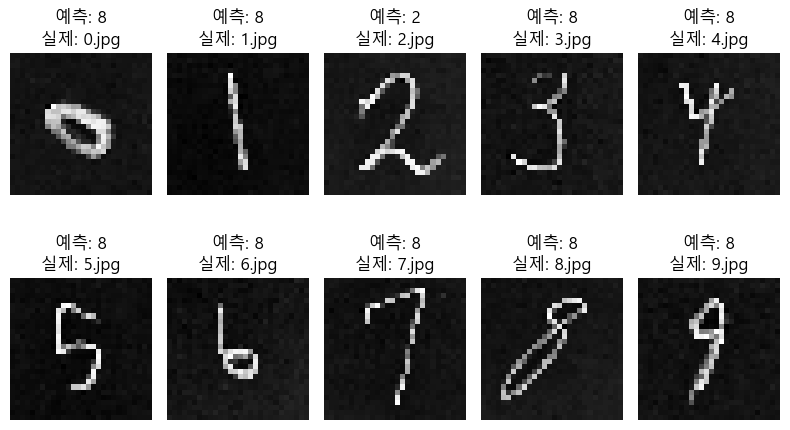

In [10]:
# 5. matplotlib : 이미지를 시각화하고 예측 결과를 함께 출력
# 6. 예외 처리 :이미지 파일이 손상됐거나 잘못된 경우 건너뛰기

# 한글 깨짐 방지 방법
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(8, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pred_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"예측: {pred_class[i]}\n실제: {pred_name[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()